<a href="https://colab.research.google.com/github/ilyasdusme/Netflix-Data-Analysis/blob/main/Netflix_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
netflix = pd.read_csv('/content/gdrive/My Drive/netflixData/Netflix_movies.csv')

In [61]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [62]:
netflix.shape

(7787, 12)

In [63]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [64]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [65]:
netflix.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


In [66]:
data = netflix.copy()

In [67]:
data.shape

(7787, 12)

In [68]:
data = data.dropna()

In [69]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [70]:
data.shape

(4808, 12)

Text(0.5, 1.0, 'tür')

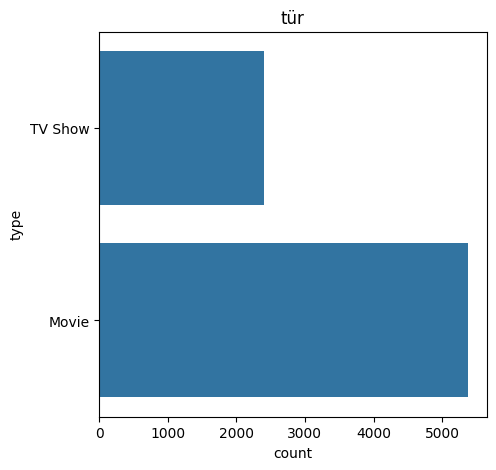

In [71]:
sns.countplot(netflix["type"])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("tür")

<ipython-input-72-2aa2cf530396>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.countplot(netflix["rating"]).set_xticklabels(sns.countplot(netflix["rating"]).get_xticklabels(),rotation=90,ha="right")


Text(0.5, 1.0, 'rating')

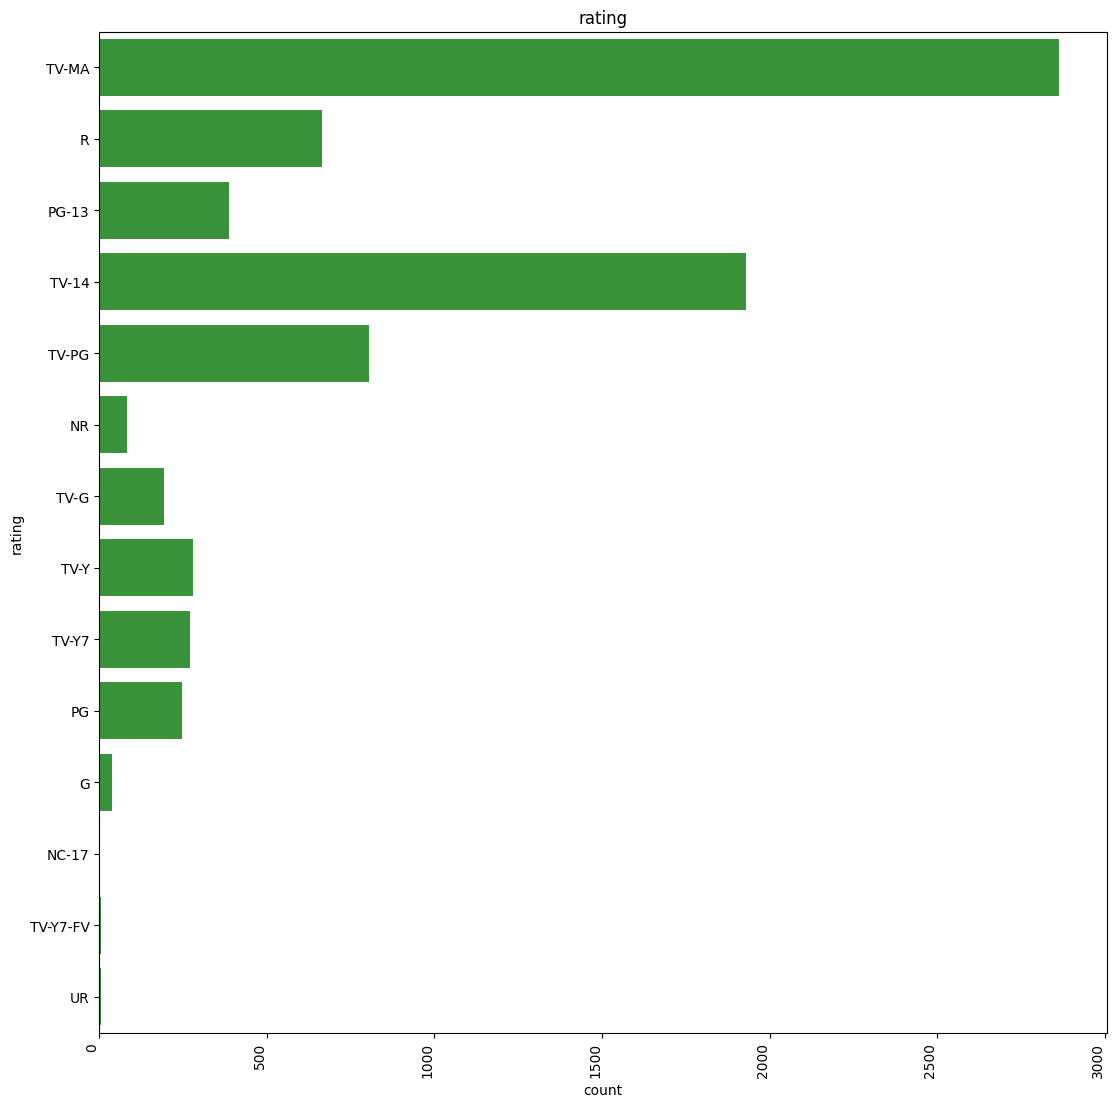

In [72]:
sns.countplot(netflix["rating"])
sns.countplot(netflix["rating"]).set_xticklabels(sns.countplot(netflix["rating"]).get_xticklabels(),rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(13,13)
plt.title("rating")

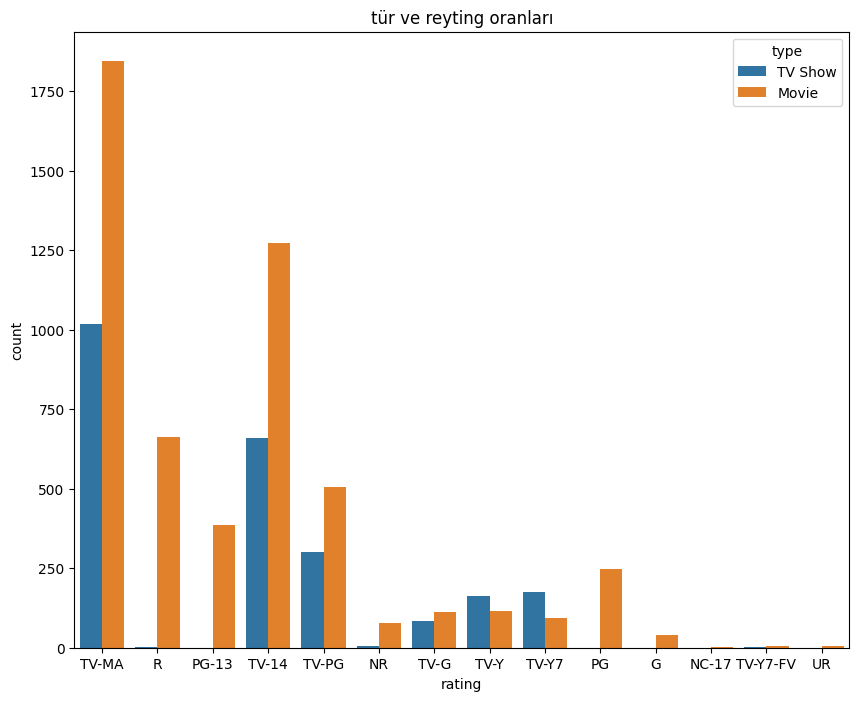

In [73]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating",hue="type",data=netflix)
plt.title("tür ve reyting oranları")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

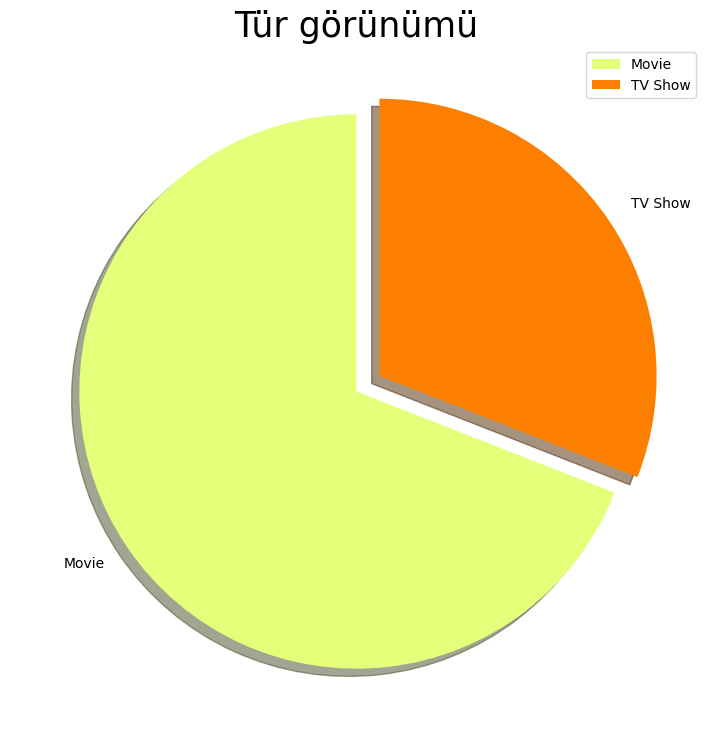

In [74]:
labels=["Movie","TV Show"]
size=netflix["type"].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,2))
explode=[0,0.1]
plt.rcParams["figure.figsize"]=(9,9)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title(" Tür görünümü ",fontsize=25)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

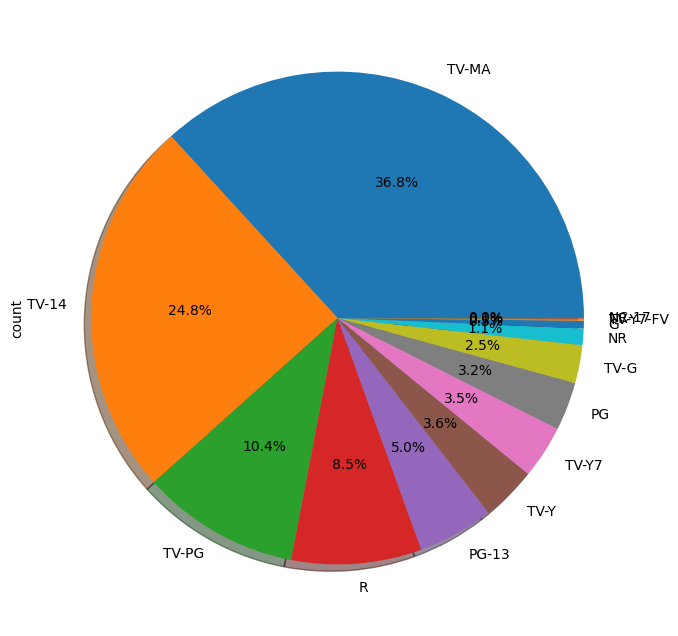

In [75]:
netflix["rating"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,figsize=(10,8))
plt.show

In [77]:
from wordcloud import WordCloud

In [78]:
pip install WordCloud

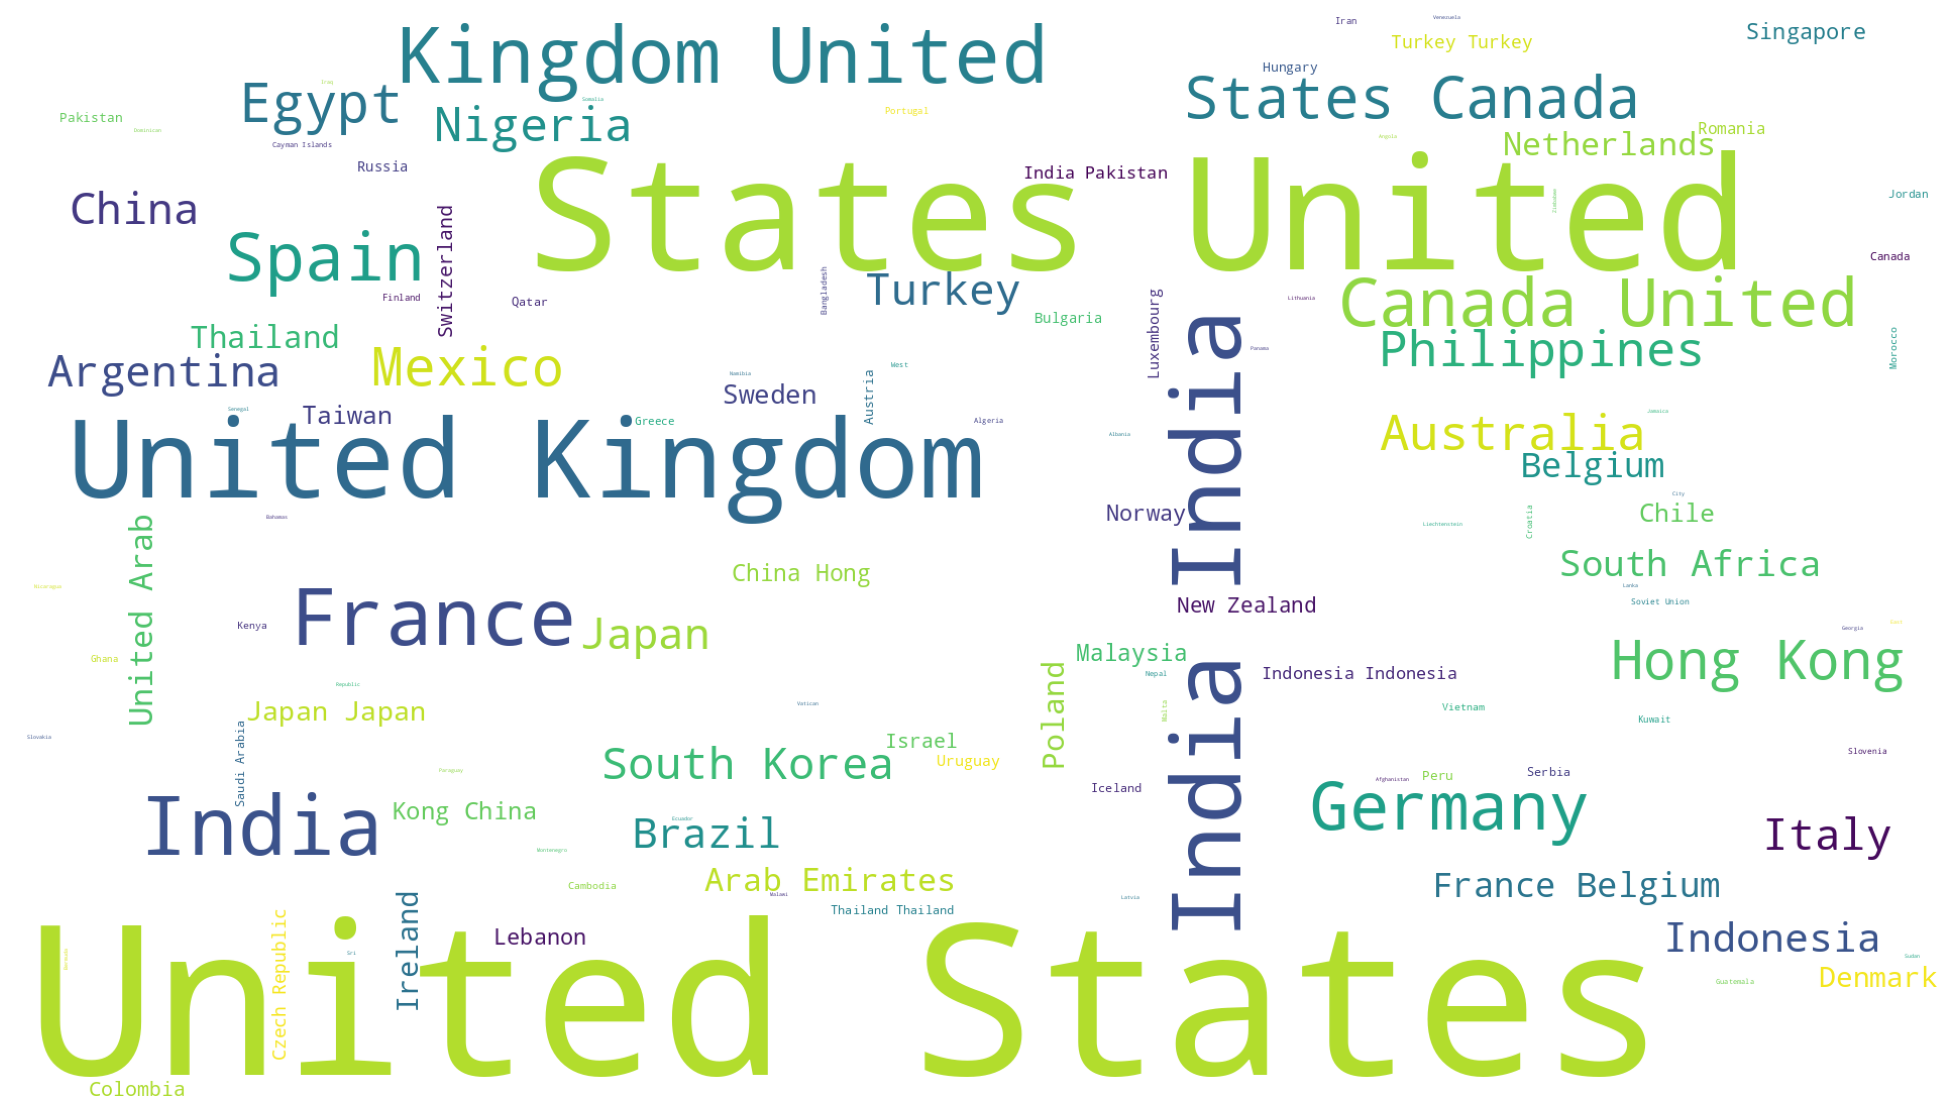

In [83]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
background_color="white",

                     width=1920,
                     height=1080
).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("country.png")
plt.show()

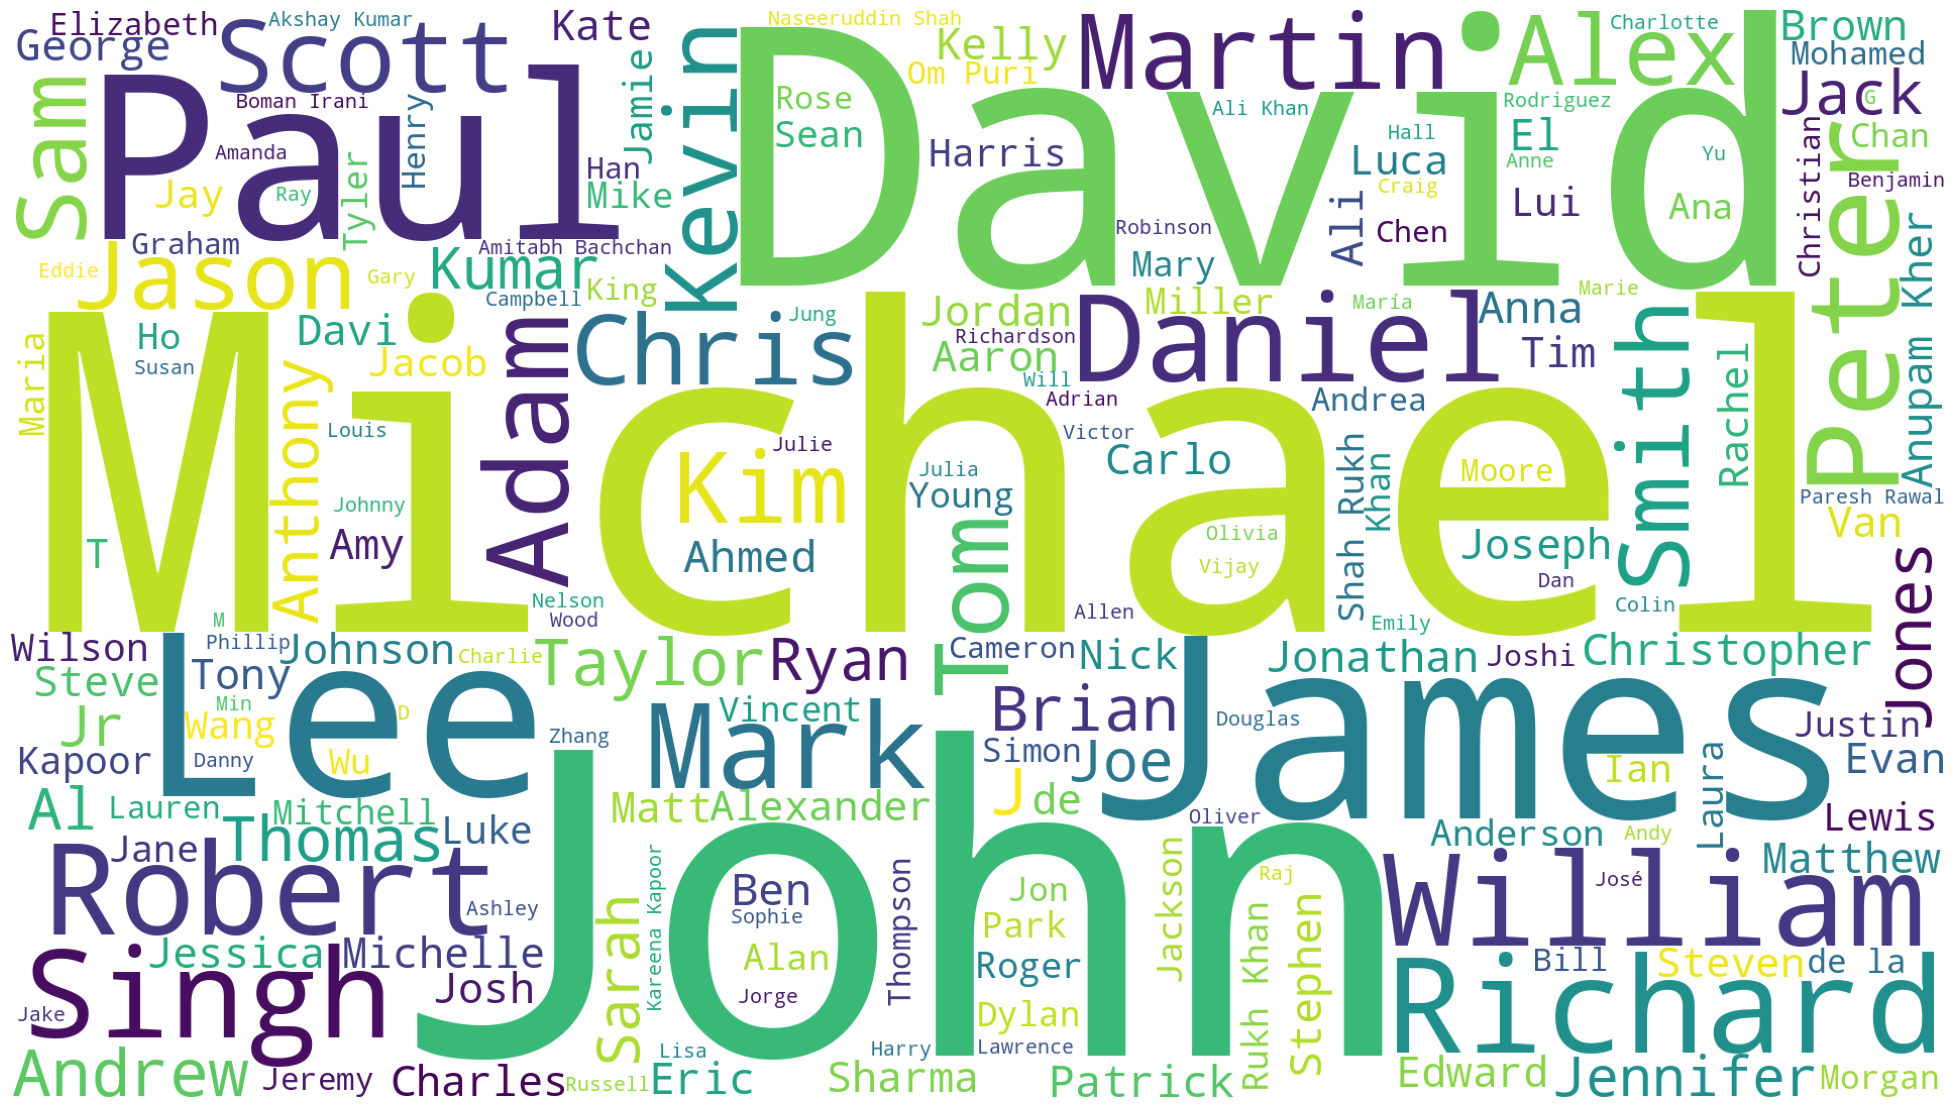

In [84]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
background_color="white",

                     width=1920,
                     height=1080
).generate(" ".join(data.cast))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("cast.png")
plt.show()

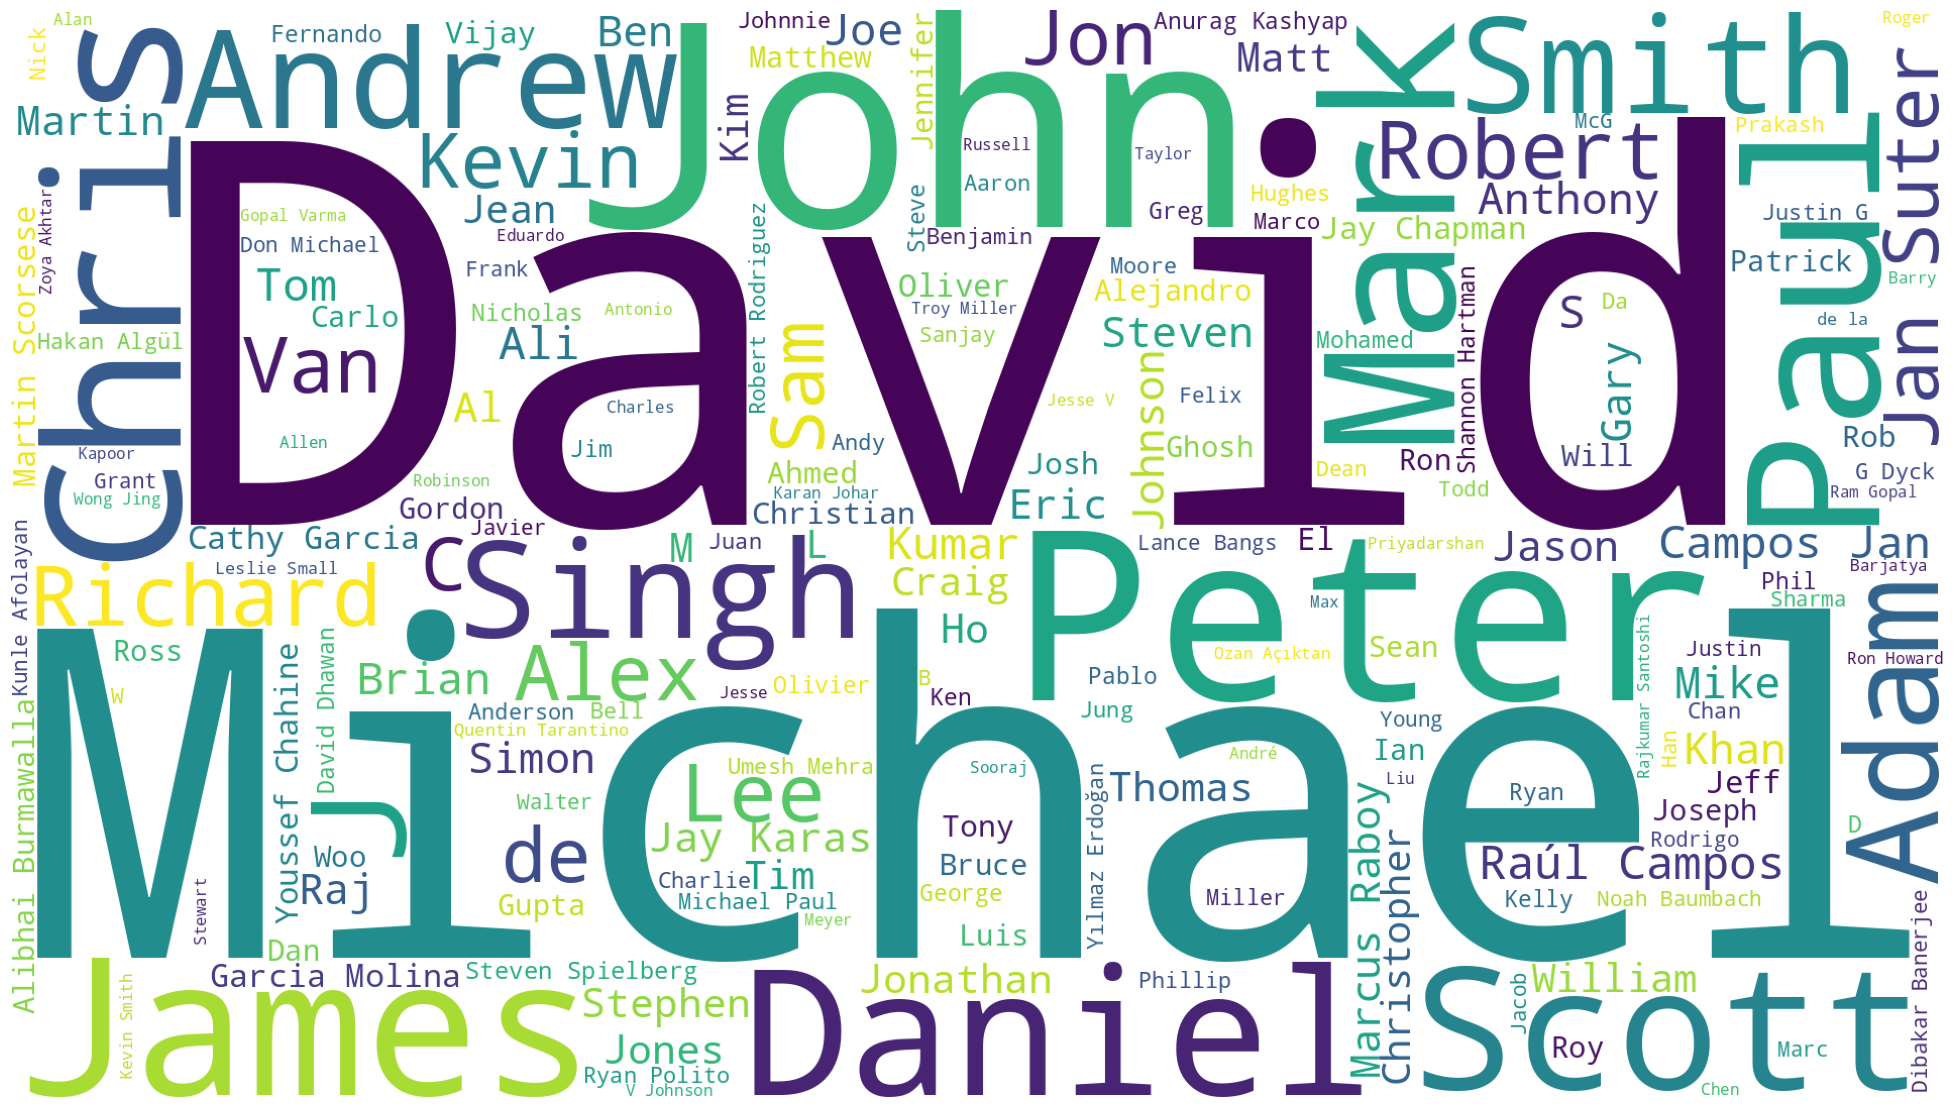

In [85]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
background_color="white",

                     width=1920,
                     height=1080
).generate(" ".join(data.director))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("director.png")
plt.show()